#Q1

https://drive.google.com/file/d/1xYomFphME-yn__m8UT69hYGvzv_XAMYa/view?usp=sharing

In [1]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1FG6IKg5KX5x9pnT6pb8CUvcJ_WcEYPiz
!gdown 1xYomFphME-yn__m8UT69hYGvzv_XAMYa

  Attempting uninstall: gdown
    Found existing installation: gdown 5.1.0
    Uninstalling gdown-5.1.0:
      Successfully uninstalled gdown-5.1.0
Downloading...
From: https://drive.google.com/uc?id=1FG6IKg5KX5x9pnT6pb8CUvcJ_WcEYPiz
To: /content/NOV9.csv
100% 7.92M/7.92M [00:00<00:00, 40.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1xYomFphME-yn__m8UT69hYGvzv_XAMYa
To: /content/NOV17.csv
100% 7.92M/7.92M [00:00<00:00, 49.4MB/s]


In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [9]:
import pandas as pd
# Load the dataset from the specified file path
df = pd.read_csv('/content/NOV9.csv', header=None)

# Display the first few rows of the DataFrame
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0,699.1,300.6,97.8,296.2,42.7,42.0,46.1,129.1,133.4,12.2,26.4,53.0,242.0,136.9,164.0,132.1
1,1,697.7,298.9,97.8,295.4,41.8,41.6,45.3,129.1,133.3,12.2,26.4,51.6,241.4,136.9,164.1,132.1
2,2,696.2,301.8,97.8,295.4,42.9,41.4,46.6,129.1,133.4,12.2,26.3,50.3,241.6,136.9,164.1,132.1
3,3,702.8,300.9,97.7,295.1,43.1,41.5,46.0,129.1,133.4,12.2,26.2,50.2,241.6,136.9,164.2,132.1
4,4,701.3,292.6,97.8,294.6,42.6,42.3,47.0,129.1,133.4,12.2,26.1,51.8,241.3,136.8,163.9,132.1


In [10]:
# Display information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86400 entries, 0 to 86399
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       86400 non-null  int64  
 1   1       86400 non-null  float64
 2   2       86400 non-null  float64
 3   3       86400 non-null  float64
 4   4       86400 non-null  float64
 5   5       86400 non-null  float64
 6   6       86400 non-null  float64
 7   7       86400 non-null  float64
 8   8       86400 non-null  float64
 9   9       86400 non-null  float64
 10  10      86400 non-null  float64
 11  11      86400 non-null  float64
 12  12      86400 non-null  float64
 13  13      86400 non-null  float64
 14  14      86400 non-null  float64
 15  15      86400 non-null  float64
 16  16      86400 non-null  float64
dtypes: float64(16), int64(1)
memory usage: 11.2 MB


In [11]:
df.shape

(86400, 17)

In [13]:
df.isnull().sum()
# Remove rows with any null values
# df.dropna(inplace=True)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
dtype: int64

In [14]:
df1 = pd.read_csv('/content/NOV17.csv', header=None)
# Display information about the DataFrame
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86400 entries, 0 to 86399
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       86400 non-null  int64  
 1   1       86400 non-null  float64
 2   2       86400 non-null  float64
 3   3       86400 non-null  float64
 4   4       86400 non-null  float64
 5   5       86400 non-null  float64
 6   6       86400 non-null  float64
 7   7       86400 non-null  float64
 8   8       86400 non-null  float64
 9   9       86400 non-null  float64
 10  10      86400 non-null  float64
 11  11      86400 non-null  float64
 12  12      86400 non-null  float64
 13  13      86400 non-null  float64
 14  14      86400 non-null  float64
 15  15      86400 non-null  float64
 16  16      86400 non-null  float64
dtypes: float64(16), int64(1)
memory usage: 11.2 MB


In [15]:
df1.isnull().sum()
# Remove rows with any null values
# df1.dropna(inplace=True)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
dtype: int64

In [23]:
# Assign labels
label_ranges = [(57274, 57549, 0), (58829, 58929, 1), (58519, 58624 , 1)]
# Initialize a new column for the labels, filling with NaN or a default label if preferred
df['Label'] = pd.NA  # Use NaN or another placeholder if no label should be default

# Apply labels based on the defined ranges
for start, end, label in label_ranges:
    df.loc[start:end, 'Label'] = label

print(df['Label'].value_counts(dropna=False))  # Check how many of each label, including NaN
labeled_df = df.dropna(subset=['Label'])
print(labeled_df.head())
labeled_df.shape

Label
<NA>    85917
0         276
1         207
Name: count, dtype: int64
           0      1      2     3      4     5     6     7      8      9    10  \
57274  57274  649.6  348.5  96.8  362.6  34.8  33.7  46.7  127.9  131.9  13.2   
57275  57275  649.3  359.5  96.8  362.9  34.8  32.9  46.5  127.8  131.9  13.2   
57276  57276  650.1  352.6  96.8  363.0  34.6  33.6  46.7  127.8  131.8  13.2   
57277  57277  648.6  361.2  96.9  364.5  34.9  33.5  46.9  127.9  131.8  13.2   
57278  57278  646.9  357.8  96.9  365.1  35.3  32.8  46.9  127.8  131.9  13.2   

         11    12     13     14     15     16 Label  
57274  20.5  68.3  271.9  139.9  168.7  133.0     0  
57275  20.5  68.8  272.0  139.9  168.8  133.0     0  
57276  20.6  65.9  271.8  139.9  168.9  133.0     0  
57277  20.7  69.1  272.1  139.9  168.7  133.0     0  
57278  20.9  68.6  272.1  139.9  168.9  133.0     0  


(483, 18)

In [25]:
# Assign labels
label_ranges1 = [(56669, 56769, 0), (54599, 54699, 1)]
# Initialize a new column for the labels, filling with NaN or a default label if preferred
df1['Label'] = pd.NA  # Use NaN or another placeholder if no label should be default

# Apply labels based on the defined ranges
for start, end, label in label_ranges1:
    df1.loc[start:end, 'Label'] = label
labeled_df1 = df1.dropna(subset=['Label'])
print(labeled_df1.head())
labeled_df1.shape

           0      1      2     3      4     5     6     7      8      9    10  \
54599  54599  630.8  372.6  96.9  372.2  33.5  31.2  46.2  128.7  132.4  13.1   
54600  54600  643.5  360.7  96.9  371.8  33.8  32.4  45.9  128.7  132.4  13.1   
54601  54601  640.8  366.8  96.9  368.0  33.4  33.4  45.7  128.7  132.4  13.1   
54602  54602  640.3  370.7  96.9  366.7  33.1  33.4  45.6  128.7  132.4  13.1   
54603  54603  633.7  376.6  96.9  367.0  32.8  31.8  45.8  128.7  132.4  13.1   

         11    12     13     14     15     16 Label  
54599  20.9  66.3  276.4  140.3  173.7  133.5     1  
54600  20.8  66.7  276.0  140.3  174.1  133.5     1  
54601  20.7  65.5  275.9  140.3  173.8  133.5     1  
54602  20.7  65.3  275.9  140.3  173.9  133.5     1  
54603  20.7  65.8  275.9  140.3  174.0  133.5     1  


(202, 18)

In [29]:
X = labeled_df.drop('Label', axis=1)  # Drop the label column to get features
y = labeled_df['Label']  # Extract the label column

# Display the first few rows of X and y to verify
print("Features (X):")
print(X.head())
print("\nLabels (y):")
print(y)

Features (X):
           0      1      2     3      4     5     6     7      8      9    10  \
57274  57274  649.6  348.5  96.8  362.6  34.8  33.7  46.7  127.9  131.9  13.2   
57275  57275  649.3  359.5  96.8  362.9  34.8  32.9  46.5  127.8  131.9  13.2   
57276  57276  650.1  352.6  96.8  363.0  34.6  33.6  46.7  127.8  131.8  13.2   
57277  57277  648.6  361.2  96.9  364.5  34.9  33.5  46.9  127.9  131.8  13.2   
57278  57278  646.9  357.8  96.9  365.1  35.3  32.8  46.9  127.8  131.9  13.2   

         11    12     13     14     15     16  
57274  20.5  68.3  271.9  139.9  168.7  133.0  
57275  20.5  68.8  272.0  139.9  168.8  133.0  
57276  20.6  65.9  271.8  139.9  168.9  133.0  
57277  20.7  69.1  272.1  139.9  168.7  133.0  
57278  20.9  68.6  272.1  139.9  168.9  133.0  

Labels (y):
57274    0
57275    0
57276    0
57277    0
57278    0
        ..
58925    1
58926    1
58927    1
58928    1
58929    1
Name: Label, Length: 483, dtype: object


In [136]:
X1 = labeled_df1.drop('Label', axis=1)  # Drop the label column to get features
y1 = labeled_df1['Label']  # Extract the label column

# Display the first few rows of X and y to verify
print("Features (X):")
print(X1.head())
print("\nLabels (y):")
print(y1)

Features (X):
           0      2      4     5     6     7      8      9    10    11    12  \
54599  54599  372.6  372.2  33.5  31.2  46.2  128.7  132.4  13.1  20.9  66.3   
54600  54600  360.7  371.8  33.8  32.4  45.9  128.7  132.4  13.1  20.8  66.7   
54601  54601  366.8  368.0  33.4  33.4  45.7  128.7  132.4  13.1  20.7  65.5   
54602  54602  370.7  366.7  33.1  33.4  45.6  128.7  132.4  13.1  20.7  65.3   
54603  54603  376.6  367.0  32.8  31.8  45.8  128.7  132.4  13.1  20.7  65.8   

          13     14     15     16  
54599  276.4  140.3  173.7  133.5  
54600  276.0  140.3  174.1  133.5  
54601  275.9  140.3  173.8  133.5  
54602  275.9  140.3  173.9  133.5  
54603  275.9  140.3  174.0  133.5  

Labels (y):
54599    1
54600    1
54601    1
54602    1
54603    1
        ..
56765    0
56766    0
56767    0
56768    0
56769    0
Name: Label, Length: 202, dtype: object


In [137]:
import pandas as pd
import numpy as np
from imblearn.under_sampling import RandomUnderSampler
df = df.drop(df.columns[0], axis=1)
# Define the index ranges and corresponding labels
label_ranges = [(57274, 57549, 0), (58829, 58929, 1), (58519, 58624 , 1)]

# Initialize a new column for labels with default values (NaN)
df['Label'] = pd.NA

# Apply labels based on the defined ranges
for start, end, label in label_ranges:
    df.loc[start:end, 'Label'] = label

# Filter only labeled data
labeled_df = df.dropna(subset=['Label'])

# Split data into features (X) and labels (y)
X = labeled_df.drop('Label', axis=1)
y = labeled_df['Label'].astype(int)  # Ensure y is of integer type

# Count the number of samples in each class before balancing
unique, counts = np.unique(y, return_counts=True)
print("Class counts before balancing:", dict(zip(unique, counts)))

# Use RandomUnderSampler to balance the classes
rus = RandomUnderSampler(random_state=64)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Count the number of samples in each class after balancing
unique_resampled, counts_resampled = np.unique(y_resampled, return_counts=True)
print("Class counts after balancing:", dict(zip(unique_resampled, counts_resampled)))

# Print the shape of the new balanced dataset
print("\nNew balanced dataset shape:", X_resampled.shape, y_resampled.shape)


Class counts before balancing: {0: 276, 1: 207}
Class counts after balancing: {0: 207, 1: 207}

New balanced dataset shape: (414, 13) (414,)


In [138]:
import pandas as pd
import numpy as np
from imblearn.under_sampling import RandomUnderSampler
df1 = df1.drop(df.columns[0], axis=1)
# Define the index ranges and corresponding labels
label_ranges1 = [(56669, 56769, 0), (54599, 54699, 1)]

# Initialize a new column for labels with default values (NaN)
df1['Label'] = pd.NA

# Apply labels based on the defined ranges
for start, end, label in label_ranges1:
    df1.loc[start:end, 'Label'] = label

# Filter only labeled data
labeled_df1 = df1.dropna(subset=['Label'])

# Split data into features (X) and labels (y)
X1 = labeled_df1.drop('Label', axis=1)
y1 = labeled_df1['Label'].astype(int)  # Ensure y is of integer type

# Count the number of samples in each class before balancing
unique, counts = np.unique(y1, return_counts=True)
print("Class counts before balancing:", dict(zip(unique, counts)))

# Use RandomUnderSampler to balance the classes
rus = RandomUnderSampler(random_state=64)
X_resampled1, y_resampled1 = rus.fit_resample(X1, y1)

# Count the number of samples in each class after balancing
unique_resampled, counts_resampled = np.unique(y_resampled1, return_counts=True)
print("Class counts after balancing:", dict(zip(unique_resampled, counts_resampled)))

# Print the shape of the new balanced dataset
print("\nNew balanced dataset shape:", X_resampled1.shape, y_resampled1.shape)

Class counts before balancing: {0: 101, 1: 101}
Class counts after balancing: {0: 101, 1: 101}

New balanced dataset shape: (202, 14) (202,)


#Q2

In [139]:
mean_values = np.mean(X_resampled, axis=1)
std_dev_values = np.std(X_resampled, axis=1)
rms_value = np.sqrt(np.mean(X_resampled**2, axis=1))
crest_factor = peak_values / rms_value
Abs_Mean_value=np.mean(np.abs(X_resampled), axis=1)
Impulse_Factor=peak_values/Abs_Mean_value
label= y_resampled

# Concatenate mean and standard deviation as features
features = np.column_stack((mean_values, std_dev_values, peak_values, rms_value, crest_factor, Abs_Mean_value, Impulse_Factor))
# Create DataFrame
Data = pd.DataFrame(features, columns=['Mean', 'Standard Deviation','Peak', 'RMS', 'Crest Factor', 'Absolute Mean', 'Impulse Factor'])
print(Data)

           Mean  Standard Deviation   Peak         RMS  Crest Factor  \
0    129.853846          110.141752  495.0  170.273976      2.907080   
1    130.069231          101.413407  608.1  164.932361      3.686966   
2    129.861538          100.123251  611.7  163.977695      3.730385   
3    121.046154          103.320894  616.4  159.145777      3.873178   
4    130.015385          109.176553  502.8  169.774910      2.961568   
..          ...                 ...    ...         ...           ...   
409  123.492308           88.485839  711.4  151.921341      4.682686   
410  122.169231           85.833940  720.6  149.307690      4.826275   
411  121.046154           82.941449  739.2  146.736006      5.037618   
412  119.930769           81.246589  753.6  144.859924      5.202267   
413  118.838462           79.353712  776.8  142.897136      5.436078   

     Absolute Mean  Impulse Factor  
0       129.853846        3.811978  
1       130.069231        4.675203  
2       129.861538      

In [140]:
#create features
mean_values1 = np.mean(X_resampled1, axis=1)
std_dev_values1 = np.std(X_resampled1, axis=1)
peak_values1 = np.max(np.abs(X_resampled1), axis=1)
rms_value1 = np.sqrt(np.mean(X_resampled1**2, axis=1))
crest_factor1 = peak_values1 / rms_value1
Abs_Mean_value1=np.mean(np.abs(X_resampled1), axis=1)
Impulse_Factor1=peak_values1/Abs_Mean_value1
label1= y_resampled1
# Concatenate mean and standard deviation as features
features1 = np.column_stack((mean_values1, std_dev_values1, peak_values1, rms_value1, crest_factor1, Abs_Mean_value1, Impulse_Factor1))
# Create DataFrame
Data_Test = pd.DataFrame(features1, columns=['Mean1', 'Standard Deviation1','Peak1', 'RMS1', 'Crest Factor1', 'Absolute Mean1', 'Impulse Factor1'])
print(Data_Test)

           Mean1  Standard Deviation1    Peak1          RMS1  Crest Factor1  \
0    4157.514286         14564.367122  56669.0  15146.145209       3.741480   
1    4158.335714         14564.426927  56670.0  15146.428213       3.741476   
2    4157.757143         14564.853690  56671.0  15146.679751       3.741480   
3    4158.050000         14565.050588  56672.0  15146.949476       3.741479   
4    4157.950000         14565.352593  56673.0  15147.212428       3.741481   
..           ...                  ...      ...           ...            ...   
197  4017.421429         14052.719376  54684.0  14615.696931       3.741457   
198  4014.142857         14044.172986  54650.0  14606.578578       3.741465   
199  4014.635714         14044.880380  54653.0  14607.394183       3.741461   
200  4014.807143         14040.419356  54637.0  14603.152129       3.741452   
201  4015.571429         14048.500243  54667.0  14611.131817       3.741462   

     Absolute Mean1  Impulse Factor1  
0       4157

In [141]:
datalabel=np.column_stack((mean_values, std_dev_values, peak_values, rms_value, crest_factor, Abs_Mean_value, Impulse_Factor,label))
Data_labeled = pd.DataFrame(datalabel, columns=['Mean', 'Standard Deviation','Peak', 'RMS', 'Crest Factor', 'Absolute Mean', 'Impulse Factor','label'])
np.random.seed(64)
np.random.shuffle(Data_labeled.values)

# Remove the header from the variables
data = Data.values
label = y_resampled
# Split the data into train/validation/test sets
x_train, x_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=64)
# Print shape of each set
print(f"train_data shape: {x_train.shape}")

print(f"test_data shape: {x_test.shape}")
print(f"train_label shape: {y_train.shape}")

print(f"test_label shape: {y_test.shape}")

train_data shape: (331, 7)
test_data shape: (83, 7)
train_label shape: (331,)
test_label shape: (83,)


In [142]:
# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
train_data = scaler.fit_transform(x_train)
test_data = scaler.transform(x_test)

In [143]:
datalabel1=np.column_stack((mean_values1, std_dev_values1, peak_values1, rms_value1, crest_factor1, Abs_Mean_value1, Impulse_Factor1,label1))
Data_labeled1 = pd.DataFrame(datalabel1, columns=['Mean1', 'Standard Deviation1','Peak1', 'RMS1', 'Crest Factor1', 'Absolute Mean1', 'Impulse Factor1','label1'])
data1 = Data_Test.values
label1 = y_resampled1
val_data = scaler.transform(data1)

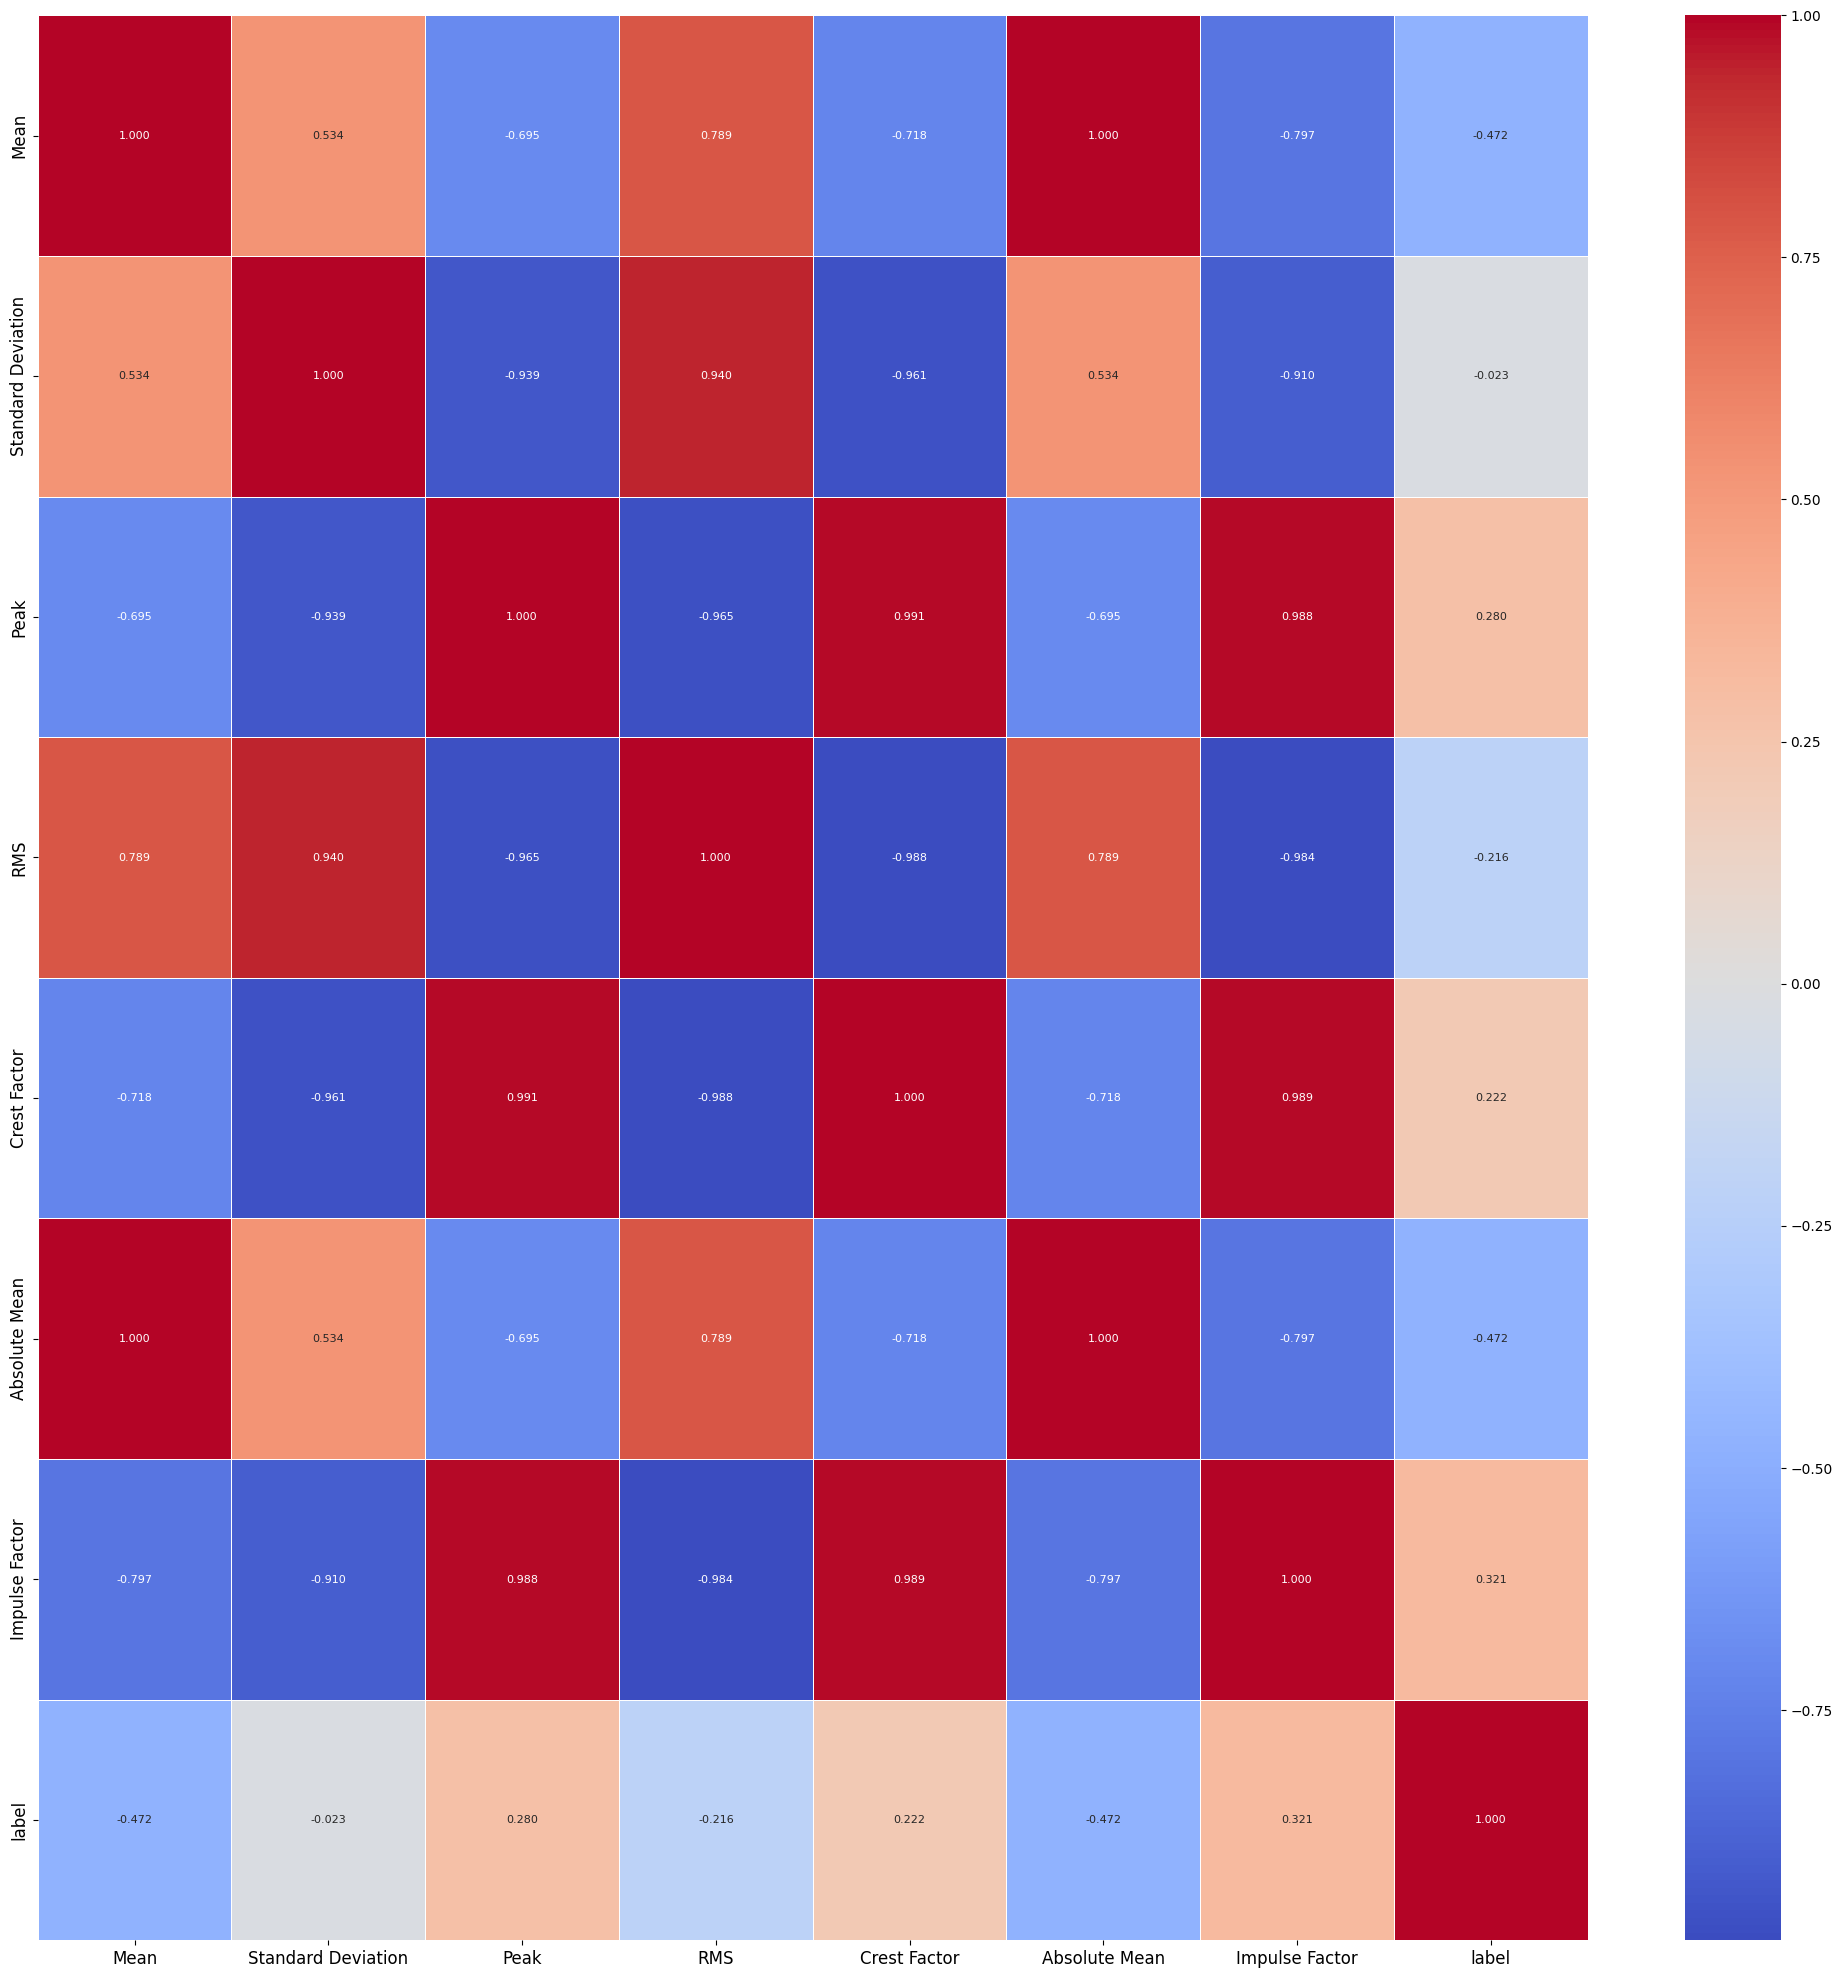

In [144]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read CSV file into DataFrame

# Calculate correlation matrix
corr_matrix = Data_labeled.corr()

# Create heatmap using seaborn
plt.figure(figsize=(25,25))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={"size": 8}, fmt='.3f', yticklabels=corr_matrix.columns)

# Adjust font size of annotations
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjust margins of PDF file
plt.savefig('PIcS1.pdf', bbox_inches='tight')

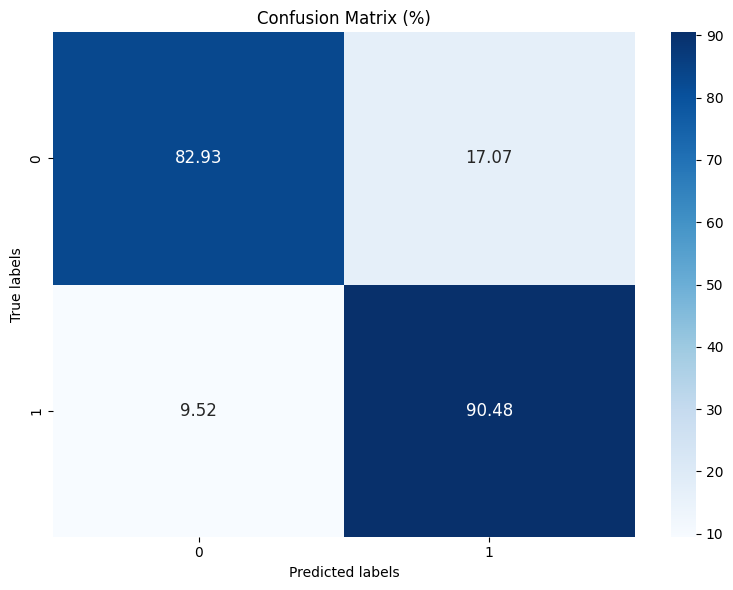

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.83      0.86        41
           1       0.84      0.90      0.87        42

    accuracy                           0.87        83
   macro avg       0.87      0.87      0.87        83
weighted avg       0.87      0.87      0.87        83



In [145]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming you've trained your model already
model = MLPClassifier(hidden_layer_sizes=(50,25), random_state=12)
model.fit(x_train, y_train)

# Making predictions on the test set
y_pred = model.predict(x_test)

# Calculating confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Calculating percentages for each cell
cf_matrix_percent = cf_matrix.astype('float') / cf_matrix.sum(axis=1)[:, np.newaxis] * 100

# Plotting confusion matrix as a heatmap with percentages
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix_percent, annot=True, fmt='.2f', cmap='Blues', annot_kws={"size": 12})

# Get the axis to modify layout
plt.gca().set_ylim(len(np.unique(y_test)), 0)  # Fix for matplotlib 3.1.1 and 3.1.2
plt.title('Confusion Matrix (%)')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# Save the plot as PNG
plt.tight_layout()
plt.savefig('confusion_matrix_percentage.png', dpi=300)
plt.show()

# Printing classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

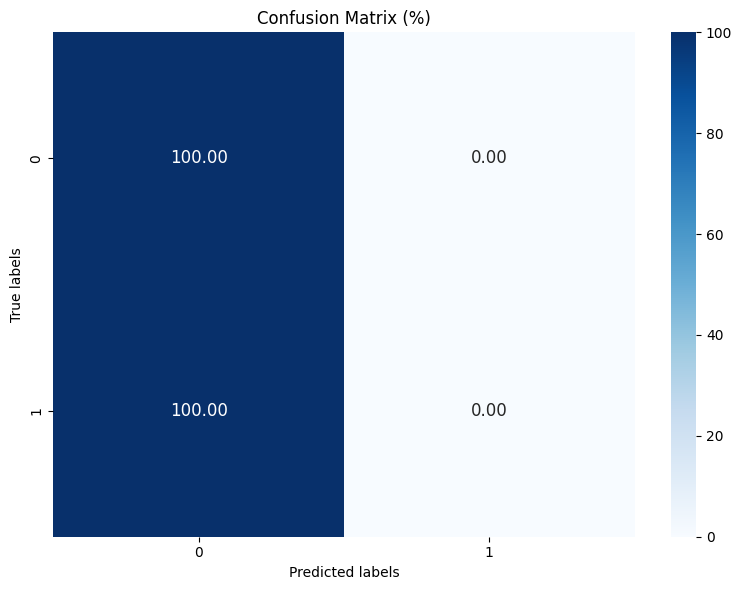

Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       101
           1       0.00      0.00      0.00       101

    accuracy                           0.50       202
   macro avg       0.25      0.50      0.33       202
weighted avg       0.25      0.50      0.33       202



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [146]:
datalabel1=np.column_stack((mean_values1, std_dev_values1, peak_values1, rms_value1, crest_factor1, Abs_Mean_value1, Impulse_Factor1,label1))
Data_labeled1 = pd.DataFrame(datalabel1, columns=['Mean1', 'Standard Deviation1','Peak1', 'RMS1', 'Crest Factor1', 'Absolute Mean1', 'Impulse Factor1','label1'])
data1 = Data_Test.values
label1 = y_resampled1
val_data = scaler.transform(data1)

y_pred1 = model.predict(val_data)
cf_matrix = confusion_matrix(label1, y_pred1)

# Calculating percentages for each cell
cf_matrix_percent = cf_matrix.astype('float') / cf_matrix.sum(axis=1)[:, np.newaxis] * 100

# Plotting confusion matrix as a heatmap with percentages
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix_percent, annot=True, fmt='.2f', cmap='Blues', annot_kws={"size": 12})

# Get the axis to modify layout
plt.gca().set_ylim(len(np.unique(label1)), 0)  # Fix for matplotlib 3.1.1 and 3.1.2
plt.title('Confusion Matrix (%)')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# Save the plot as PNG
plt.tight_layout()
plt.savefig('confusion_matrix_percentage.png', dpi=300)
plt.show()

# Printing classification report
print("Classification Report:")
print(classification_report(label1, y_pred1))

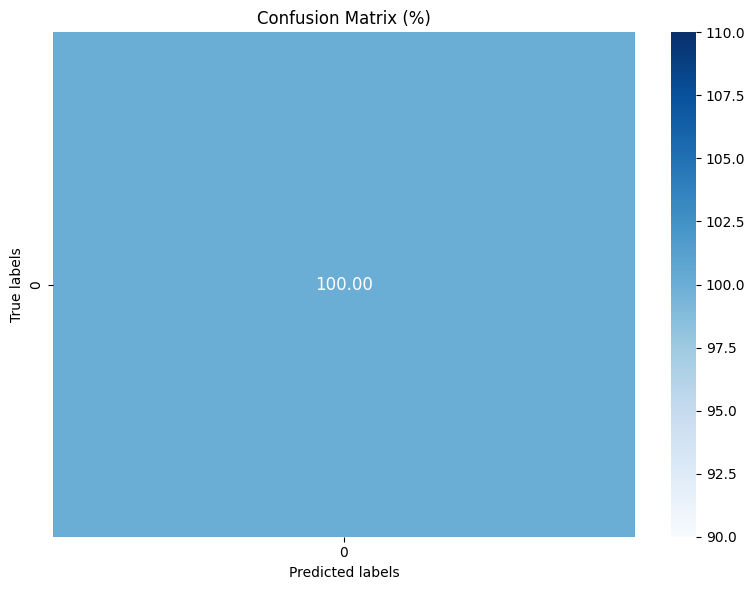

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       202

    accuracy                           1.00       202
   macro avg       1.00      1.00      1.00       202
weighted avg       1.00      1.00      1.00       202



In [135]:
data1 = Data_Test.values
label1 = y_resampled1
val_data = scaler.transform(data1)
y_pred1 = model.predict(val_data)

# Calculating confusion matrix
cf_matrix = confusion_matrix(label1, y_pred1)

# Calculating percentages for each cell
cf_matrix_percent = cf_matrix.astype('float') / cf_matrix.sum(axis=1)[:, np.newaxis] * 100

# Plotting confusion matrix as a heatmap with percentages
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix_percent, annot=True, fmt='.2f', cmap='Blues', annot_kws={"size": 12})

# Get the axis to modify layout
plt.gca().set_ylim(len(np.unique(label1)), 0)  # Fix for matplotlib 3.1.1 and 3.1.2
plt.title('Confusion Matrix (%)')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# Save the plot as PNG
plt.tight_layout()
plt.savefig('confusion_matrix_percentage.png', dpi=300)
plt.show()

# Printing classification report
print("Classification Report:")
print(classification_report(label1, y_pred1))